<a href="https://colab.research.google.com/github/szh141/Examples/blob/main/Convolution_local_perceptron_unit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://medium.com/aimonks/enhancing-deep-learning-with-convolution-based-local-perceptron-units-a-novel-approach-to-spatial-2a2d14168f27

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class CLPU:
    def __init__(self, input_shape, kernel_size, stride):
        self.input_shape = input_shape  # Added to ensure input_shape is accessible throughout the class
        self.kernel_size = kernel_size
        self.stride = stride
        self.weights = np.random.rand(kernel_size, kernel_size) - 0.5
        self.bias = np.random.rand() - 0.5
        self.accuracy_history = []

    def evaluate(self, X_test, y_test):
        predictions = np.array([self.forward(x) for x in X_test])
        accuracy = np.mean(predictions == y_test)
        return accuracy

    def forward(self, input):
        input_shape = input.shape[0] # Assuming input is a square matrix
        output_dim = (input_shape - self.kernel_size) // self.stride + 1
        output = np.zeros((output_dim, output_dim))
        for i in range(0, input_shape - self.kernel_size + 1, self.stride):
            for j in range(0, input_shape - self.kernel_size + 1, self.stride):
                input_slice = input[i:i+self.kernel_size, j:j+self.kernel_size]
                if input_slice.shape == (self.kernel_size, self.kernel_size): # Check slice shape
                    output[i//self.stride, j//self.stride] = np.sum(input_slice * self.weights) + self.bias
                else: # Handle unexpected slice size (should not happen with correct bounds)
                    raise ValueError(f"Invalid input slice shape: {input_slice.shape}")
        return output > 0 # Activation function (step function)

    def train(self, X, y, epochs, lr):
        for epoch in range(epochs):
            for input, label in zip(X, y):
                for i in range(0, self.input_shape - self.kernel_size + 1, self.stride):
                    for j in range(0, self.input_shape - self.kernel_size + 1, self.stride):
                        window = input[i:i+self.kernel_size, j:j+self.kernel_size]
                        output = self.forward(window)
                        error = label[i//self.stride, j//self.stride] - output
                        self.weights += lr * error * window
                        self.bias += lr * error

            # Move evaluation out of the inner loops to execute once per epoch
            accuracy = self.evaluate(X, y)
            self.accuracy_history.append(accuracy)
            print(f"Epoch {epoch + 1}, Accuracy: {accuracy}")

# Example synthetic dataset generation and training (simplified for illustration)
input_shape = 10
kernel_size = 3
stride = 1

# Generate synthetic data
X = np.random.rand(100, input_shape, input_shape) * 2 - 1 # 100 samples of 10x10
y = np.random.randint(0, 2, (100, (input_shape - kernel_size) // stride + 1, (input_shape - kernel_size) // stride + 1)) # Binary labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize, train and evaluate CLPU
clpu = CLPU(input_shape, kernel_size, stride)
clpu.train(X_train, y_train, epochs=10, lr=0.01)
accuracy = clpu.evaluate(X_test,y_test)

print(f"Accuracy: {accuracy}")

<ipython-input-3-c035ed11f718>:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  output[i//self.stride, j//self.stride] = np.sum(input_slice * self.weights) + self.bias


Epoch 1, Accuracy: 0.5044921875
Epoch 2, Accuracy: 0.50859375
Epoch 3, Accuracy: 0.4982421875
Epoch 4, Accuracy: 0.500390625
Epoch 5, Accuracy: 0.499609375
Epoch 6, Accuracy: 0.5048828125
Epoch 7, Accuracy: 0.5029296875
Epoch 8, Accuracy: 0.498046875
Epoch 9, Accuracy: 0.503515625
Epoch 10, Accuracy: 0.4990234375
Accuracy: 0.5125


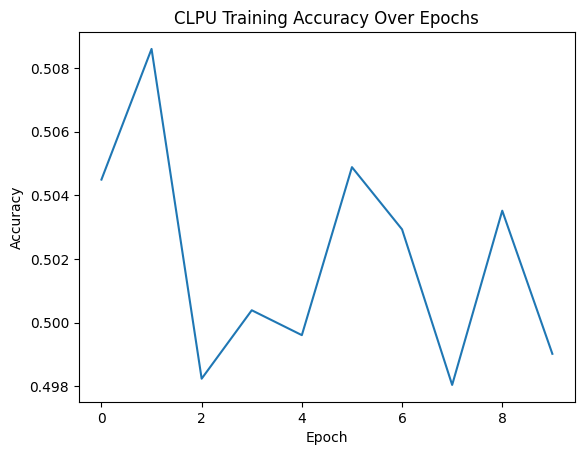

In [4]:
import matplotlib.pyplot as plt

plt.plot(clpu.accuracy_history)
plt.title('CLPU Training Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

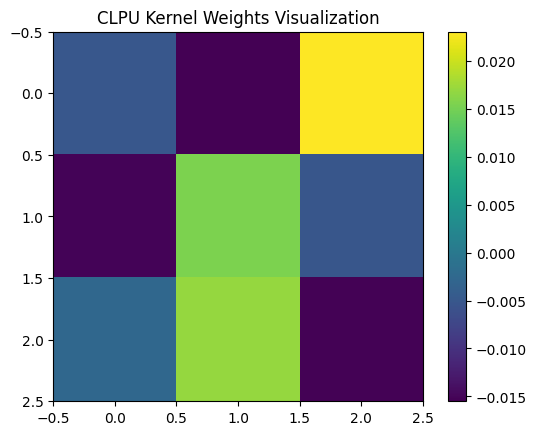

In [6]:
plt.imshow(clpu.weights, cmap='viridis')
plt.title('CLPU Kernel Weights Visualization')
plt.colorbar()
plt.show()